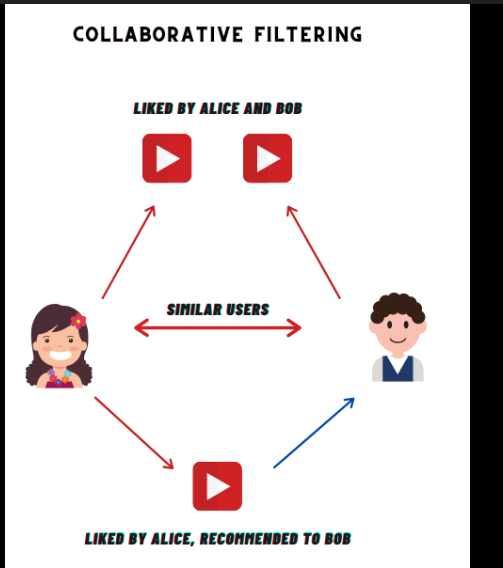

In [21]:
from IPython.display import Image, display

# Resim dosyasının yolu
image_path = "image.png"

# Resmi görüntüleme
display(Image(filename=image_path))


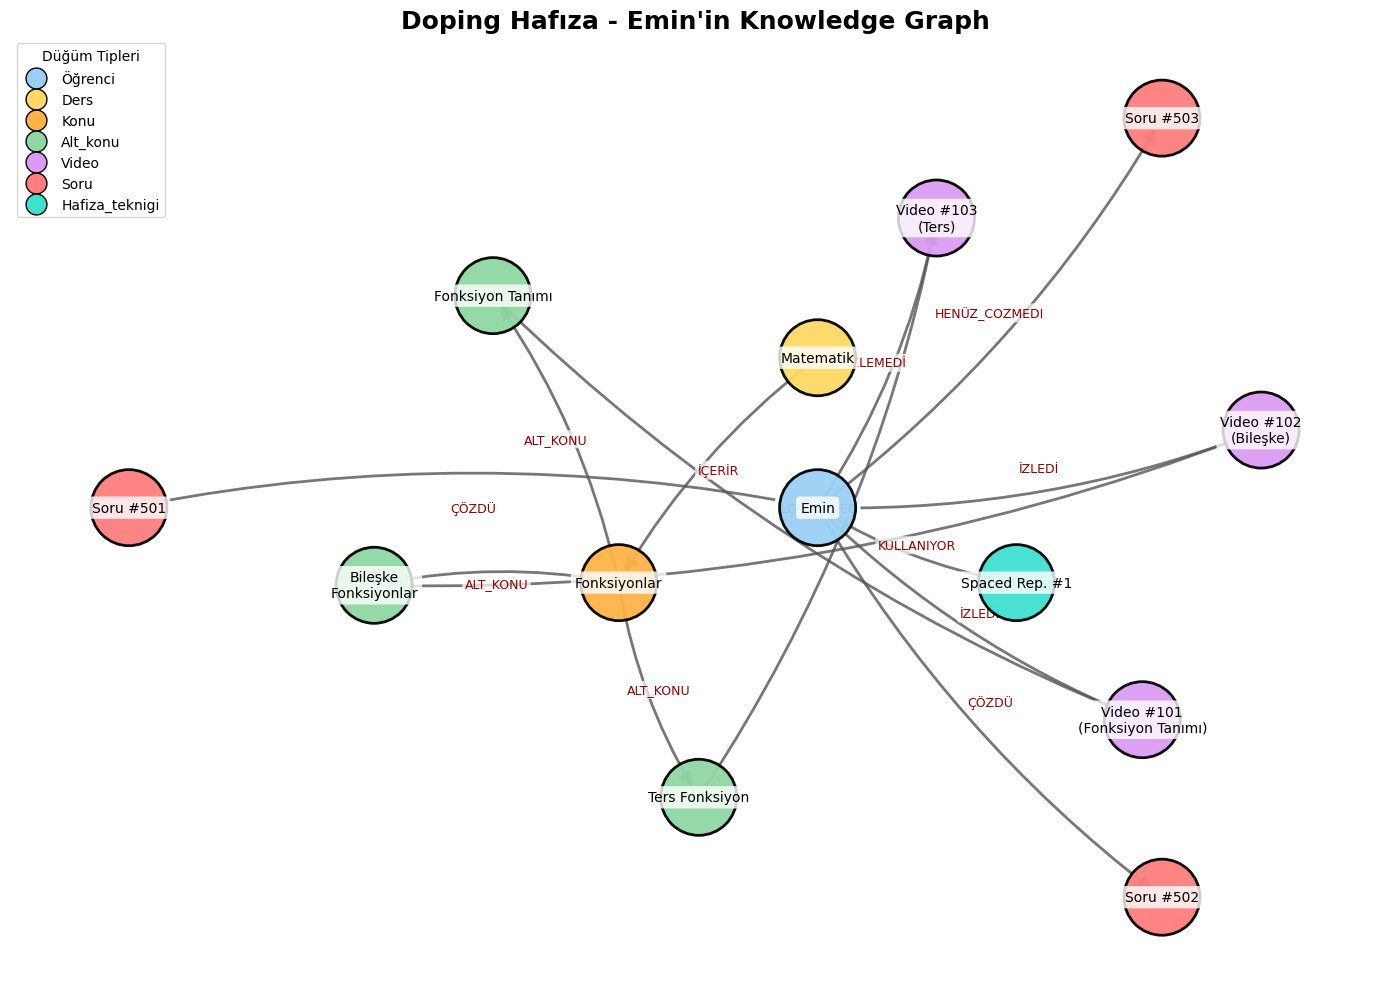

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def create_knowledge_graph():
    """
    Knowledge Graph'ü (yönlü) oluşturur ve düğümleri, kenarları ekler.
    """
    KG = nx.DiGraph()

    # ─────────────────────────────────────────────────────────────
    # 1) Öğrenci ve Öğrenme Bilgileri
    # ─────────────────────────────────────────────────────────────
    KG.add_node(
        "Emin",
        type="öğrenci",
        fullName="Emin Yılmaz",
        age=17,
        city="İstanbul",
        email="[email protected]",
        school="İstanbul Lisesi",
        classLevel="11. Sınıf",
        hedef="Tıp Fakültesi",
        VideoCount=5,
        SolvedQCount=40,
        Accuracy=0.78,
        VideoTime=120,           # dakika
        RevisionCount=3,
        LastActivity="2025-01-25",
        DifficultyPerception=7,  # (1-10)
        SelfAssessment=6,        # (1-10)
        ProgressScore=70,        # (0-100)
        AvgSolveTime=42,         # sn/soru
        HardestSub="Bileşke Fonksiyonlar",
        label="Emin"
    )

    # ─────────────────────────────────────────────────────────────
    # 2) Ders, Konu, Alt Konular
    # ─────────────────────────────────────────────────────────────
    KG.add_node("Matematik",           type="ders",     label="Matematik")
    KG.add_node("Fonksiyonlar",        type="konu",     label="Fonksiyonlar")
    KG.add_node("Fonksiyon Tanımı",    type="alt_konu", label="Fonksiyon Tanımı")
    KG.add_node("Bileşke Fonksiyonlar",type="alt_konu", label="Bileşke\nFonksiyonlar")
    KG.add_node("Ters Fonksiyon",      type="alt_konu", label="Ters Fonksiyon")

    # ─────────────────────────────────────────────────────────────
    # 3) Videolar
    # ─────────────────────────────────────────────────────────────
    KG.add_node("Video #101", type="video", label="Video #101\n(Fonksiyon Tanımı)")
    KG.add_node("Video #102", type="video", label="Video #102\n(Bileşke)")
    KG.add_node("Video #103", type="video", label="Video #103\n(Ters)")

    # ─────────────────────────────────────────────────────────────
    # 4) Sorular
    # ─────────────────────────────────────────────────────────────
    KG.add_node("Soru #501", type="soru", label="Soru #501")
    KG.add_node("Soru #502", type="soru", label="Soru #502")
    KG.add_node("Soru #503", type="soru", label="Soru #503")

    # ─────────────────────────────────────────────────────────────
    # 5) Hafıza Tekniği / Tekrar Planı
    # ─────────────────────────────────────────────────────────────
    KG.add_node("Spaced Rep. #1", type="hafiza_teknigi", label="Spaced Rep. #1")

    # ─────────────────────────────────────────────────────────────
    # 6) İlişkiler (Edges) + Özellikler
    # ─────────────────────────────────────────────────────────────
    KG.add_edge("Matematik", "Fonksiyonlar", relation="İÇERİR")

    KG.add_edge("Fonksiyonlar", "Fonksiyon Tanımı",      relation="ALT_KONU")
    KG.add_edge("Fonksiyonlar", "Bileşke Fonksiyonlar",  relation="ALT_KONU")
    KG.add_edge("Fonksiyonlar", "Ters Fonksiyon",        relation="ALT_KONU")

    KG.add_edge("Fonksiyon Tanımı",      "Video #101", relation="İLGİLİ_VIDEO")
    KG.add_edge("Bileşke Fonksiyonlar",  "Video #102", relation="İLGİLİ_VIDEO")
    KG.add_edge("Ters Fonksiyon",        "Video #103", relation="İLGİLİ_VIDEO")

    KG.add_edge("Emin", "Video #101", relation="İZLEDİ", izlemeSuresi=15)
    KG.add_edge("Emin", "Video #102", relation="İZLEDİ", izlemeSuresi=10)
    KG.add_edge("Emin", "Video #103", relation="İZLEMEDİ")

    KG.add_edge("Emin", "Soru #501", relation="ÇÖZDÜ", sonuc="doğru",  cozumSuresi=45)
    KG.add_edge("Emin", "Soru #502", relation="ÇÖZDÜ", sonuc="yanlış", cozumSuresi=60)
    KG.add_edge("Emin", "Soru #503", relation="HENÜZ_COZMEDI")

    KG.add_edge("Emin", "Spaced Rep. #1", relation="KULLANIYOR")

    return KG

def plot_knowledge_graph(KG):
    """
    Oluşturulan Knowledge Graph'ü kullanıcı dostu ve görsel olarak şık bir biçimde görselleştirir.
    """
    # ─────────────────────────────────────────────────────────────
    # Renk Ayarları: Düğüm tiplerine göre renk seçimi
    # ─────────────────────────────────────────────────────────────
    node_type_colors = {
        "öğrenci":         "#9ad0f5",  # açık mavi
        "ders":            "#ffd966",  # sarı
        "konu":            "#ffb347",  # turuncu
        "alt_konu":        "#91d7a3",  # yeşil
        "video":           "#da9cf3",  # mor/pembe
        "soru":            "#ff7f7f",  # kırmızı
        "hafiza_teknigi":  "#40e0d0"   # turkuaz
    }

    # Her düğümün tipi için renk belirleme
    node_colors = [
        node_type_colors.get(KG.nodes[node].get("type", ""), "#888888")
        for node in KG.nodes
    ]

    # ─────────────────────────────────────────────────────────────
    # Layout Ayarı: Shell Layout ile katmanlı düzen
    # Katmanlar: 1. Emin, 2. Ders/Konu/Hafıza Tekniği, 3. Alt Konular & Videolar, 4. Sorular
    # ─────────────────────────────────────────────────────────────
    shells = [
        ["Emin"],
        ["Matematik", "Fonksiyonlar", "Spaced Rep. #1"],
        ["Fonksiyon Tanımı", "Bileşke Fonksiyonlar", "Ters Fonksiyon",
         "Video #101", "Video #102", "Video #103"],
        ["Soru #501", "Soru #502", "Soru #503"]
    ]
    pos = nx.shell_layout(KG, nlist=shells)

    plt.figure(figsize=(14, 10))
    ax = plt.gca()

    # ─────────────────────────────────────────────────────────────
    # Düğümleri çiz: Daha büyük boyut, kalın kenarlık ve yüksek opaklık
    # ─────────────────────────────────────────────────────────────
    nx.draw_networkx_nodes(
        KG, pos,
        node_color=node_colors,
        node_size=3000,
        edgecolors="black",
        linewidths=2,
        alpha=0.95
    )

    # ─────────────────────────────────────────────────────────────
    # Kenarları çiz: Hafif kavisli ve arrowstyle eklenmiş
    # ─────────────────────────────────────────────────────────────
    nx.draw_networkx_edges(
        KG, pos,
        width=2,
        alpha=0.8,
        arrows=True,
        arrowsize=20,
        arrowstyle='-|>',
        edge_color="#555555",
        connectionstyle="arc3,rad=0.1"
    )

    # ─────────────────────────────────────────────────────────────
    # Düğüm etiketleri: Arka planlı kutucuklar ile okunabilirlik artırıldı
    # ─────────────────────────────────────────────────────────────
    labels = {node: KG.nodes[node]["label"] for node in KG.nodes}
    nx.draw_networkx_labels(
        KG, pos,
        labels=labels,
        font_size=10,
        font_color="black",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", boxstyle="round,pad=0.3")
    )

    # ─────────────────────────────────────────────────────────────
    # Kenar etiketleri: İlişki bilgilerini arka planlı kutucuklarla sunma
    # ─────────────────────────────────────────────────────────────
    edge_labels = nx.get_edge_attributes(KG, "relation")
    nx.draw_networkx_edge_labels(
        KG, pos,
        edge_labels=edge_labels,
        font_color="darkred",
        font_size=9,
        rotate=False,
        label_pos=0.5,
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round,pad=0.2")
    )

    # ─────────────────────────────────────────────────────────────
    # Legend: Düğüm tiplerinin renklerini gösteren açıklama
    # ─────────────────────────────────────────────────────────────
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=ntype.capitalize(),
               markerfacecolor=color, markersize=15, markeredgecolor='black')
        for ntype, color in node_type_colors.items()
    ]
    plt.legend(handles=legend_elements, loc='upper left', title="Düğüm Tipleri")

    plt.title("Doping Hafıza - Emin'in Knowledge Graph", fontsize=18, fontweight='bold')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def main():
    KG = create_knowledge_graph()
    plot_knowledge_graph(KG)

if __name__ == "__main__":
    main()


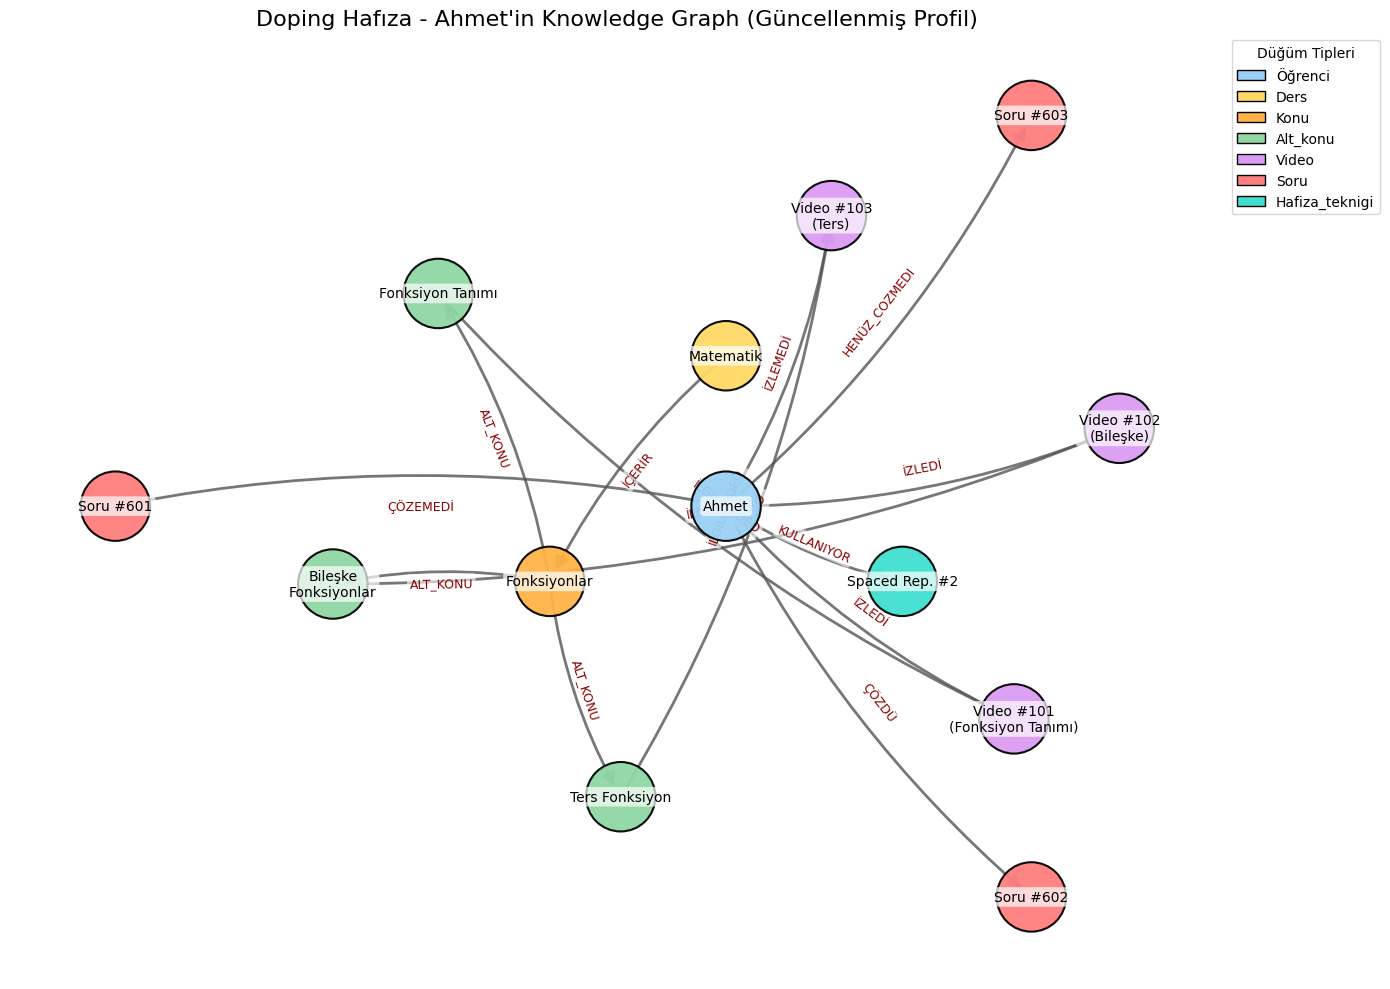

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def create_ahmet_knowledge_graph():
    """
    Ahmet'in Knowledge Graph'ünü oluşturur.
    """
    KG_Ahmet = nx.DiGraph()

    # ─────────────────────────────────────────────────────────────
    # 1) Öğrenci ve Öğrenme Bilgileri (Güncellenmiş Ahmet Profili)
    # ─────────────────────────────────────────────────────────────
    KG_Ahmet.add_node(
        "Ahmet",
        type="öğrenci",
        fullName="Ahmet Demir",          # İsimde değişiklik
        age=17,                          # Yaş: 17
        city="Ankara",
        email="[email protected]",
        school="Ankara Fen Lisesi",
        classLevel="12. Sınıf",
        hedef="Mühendislik Fakültesi",   # Hedef güncellendi
        VideoCount=5,                    # Emin ile uyumlu, fakat farklı sayı
        SolvedQCount=38,                 # Hafif artan soru çözme sayısı
        Accuracy=0.77,                   # Yaklaşık benzer doğruluk
        VideoTime=115,                   # Dakika cinsinden video izleme süresi
        RevisionCount=3,                 # Tekrar sayısı
        LastActivity="2025-02-01",       # Son aktivite tarihi
        DifficultyPerception=7,          # Zorluk algısı
        SelfAssessment=6,
        ProgressScore=68,                # İlerleme skoru
        AvgSolveTime=44,                 # Ortalama soru çözme süresi (sn/soru)
        HardestSub="Fonksiyon Tanımı",   # En zorlandığı konu
        label="Ahmet"
    )

    # ─────────────────────────────────────────────────────────────
    # 2) Ders, Konu, Alt Konular
    # ─────────────────────────────────────────────────────────────
    KG_Ahmet.add_node("Matematik",            type="ders",     label="Matematik")
    KG_Ahmet.add_node("Fonksiyonlar",         type="konu",     label="Fonksiyonlar")
    KG_Ahmet.add_node("Fonksiyon Tanımı",     type="alt_konu", label="Fonksiyon Tanımı")
    KG_Ahmet.add_node("Bileşke Fonksiyonlar", type="alt_konu", label="Bileşke\nFonksiyonlar")
    KG_Ahmet.add_node("Ters Fonksiyon",       type="alt_konu", label="Ters Fonksiyon")

    # ─────────────────────────────────────────────────────────────
    # 3) Videolar
    # ─────────────────────────────────────────────────────────────
    KG_Ahmet.add_node("Video #101", type="video", label="Video #101\n(Fonksiyon Tanımı)")
    KG_Ahmet.add_node("Video #102", type="video", label="Video #102\n(Bileşke)")
    KG_Ahmet.add_node("Video #103", type="video", label="Video #103\n(Ters)")

    # ─────────────────────────────────────────────────────────────
    # 4) Sorular
    # ─────────────────────────────────────────────────────────────
    KG_Ahmet.add_node("Soru #601", type="soru", label="Soru #601")
    KG_Ahmet.add_node("Soru #602", type="soru", label="Soru #602")
    KG_Ahmet.add_node("Soru #603", type="soru", label="Soru #603")

    # ─────────────────────────────────────────────────────────────
    # 5) Hafıza Tekniği / Tekrar Planı
    # ─────────────────────────────────────────────────────────────
    KG_Ahmet.add_node("Spaced Rep. #2", type="hafiza_teknigi", label="Spaced Rep. #2")

    # ─────────────────────────────────────────────────────────────
    # 6) İlişkiler (Edges) + Özellikler
    # ─────────────────────────────────────────────────────────────
    KG_Ahmet.add_edge("Matematik", "Fonksiyonlar", relation="İÇERİR")

    KG_Ahmet.add_edge("Fonksiyonlar", "Fonksiyon Tanımı",      relation="ALT_KONU")
    KG_Ahmet.add_edge("Fonksiyonlar", "Bileşke Fonksiyonlar",  relation="ALT_KONU")
    KG_Ahmet.add_edge("Fonksiyonlar", "Ters Fonksiyon",        relation="ALT_KONU")

    KG_Ahmet.add_edge("Fonksiyon Tanımı",     "Video #101", relation="İLGİLİ_VIDEO")
    KG_Ahmet.add_edge("Bileşke Fonksiyonlar", "Video #102", relation="İLGİLİ_VIDEO")
    KG_Ahmet.add_edge("Ters Fonksiyon",       "Video #103", relation="İLGİLİ_VIDEO")

    KG_Ahmet.add_edge("Ahmet", "Video #101", relation="İZLEDİ",    izlemeSuresi=20)
    KG_Ahmet.add_edge("Ahmet", "Video #102", relation="İZLEDİ",    izlemeSuresi=15)
    KG_Ahmet.add_edge("Ahmet", "Video #103", relation="İZLEMEDİ")

    KG_Ahmet.add_edge("Ahmet", "Soru #601", relation="ÇÖZEMEDİ", sonuc="yanlış", cozumSuresi=65)
    KG_Ahmet.add_edge("Ahmet", "Soru #602", relation="ÇÖZDÜ",    sonuc="doğru",  cozumSuresi=40)
    KG_Ahmet.add_edge("Ahmet", "Soru #603", relation="HENÜZ_COZMEDI")

    KG_Ahmet.add_edge("Ahmet", "Spaced Rep. #2", relation="KULLANIYOR")

    return KG_Ahmet

def plot_ahmet_knowledge_graph(KG_Ahmet):
    """
    Ahmet'in Knowledge Graph'ünü görselleştirir.
    """
    node_type_colors = {
        "öğrenci":         "#9ad0f5",
        "ders":            "#ffd966",
        "konu":            "#ffb347",
        "alt_konu":        "#91d7a3",
        "video":           "#da9cf3",
        "soru":            "#ff7f7f",
        "hafiza_teknigi":  "#40e0d0"
    }
    node_colors = [
        node_type_colors.get(KG_Ahmet.nodes[node].get("type", ""), "#888888")
        for node in KG_Ahmet.nodes
    ]

    shells = [
        ["Ahmet"],
        ["Matematik", "Fonksiyonlar", "Spaced Rep. #2"],
        ["Fonksiyon Tanımı", "Bileşke Fonksiyonlar", "Ters Fonksiyon",
         "Video #101", "Video #102", "Video #103"],
        ["Soru #601", "Soru #602", "Soru #603"]
    ]
    pos = nx.shell_layout(KG_Ahmet, nlist=shells)

    plt.figure(figsize=(14, 10))
    ax = plt.gca()

    nx.draw_networkx_nodes(
        KG_Ahmet,
        pos,
        node_color=node_colors,
        node_size=2500,
        edgecolors="black",
        linewidths=1.5,
        alpha=0.95
    )

    nx.draw_networkx_edges(
        KG_Ahmet,
        pos,
        width=2,
        alpha=0.8,
        arrows=True,
        arrowsize=20,
        arrowstyle='-|>',
        edge_color="#555555",
        connectionstyle="arc3,rad=0.1"
    )

    node_labels = {node: KG_Ahmet.nodes[node]["label"] for node in KG_Ahmet.nodes}
    nx.draw_networkx_labels(
        KG_Ahmet,
        pos,
        labels=node_labels,
        font_size=10,
        font_color="black",
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2')
    )

    edge_labels = nx.get_edge_attributes(KG_Ahmet, "relation")
    nx.draw_networkx_edge_labels(
        KG_Ahmet,
        pos,
        edge_labels=edge_labels,
        font_color="darkred",
        font_size=9,
        label_pos=0.5,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
    )

    legend_elements = [
        Patch(facecolor=color, edgecolor='black', label=ntype.capitalize())
        for ntype, color in node_type_colors.items()
    ]
    plt.legend(
        handles=legend_elements,
        title="Düğüm Tipleri",
        loc='upper left',
        bbox_to_anchor=(1, 1)
    )

    plt.title("Doping Hafıza - Ahmet'in Knowledge Graph (Güncellenmiş Profil)", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def main_ahmet():
    KG_Ahmet = create_ahmet_knowledge_graph()
    plot_ahmet_knowledge_graph(KG_Ahmet)

if __name__ == "__main__":
    main_ahmet()


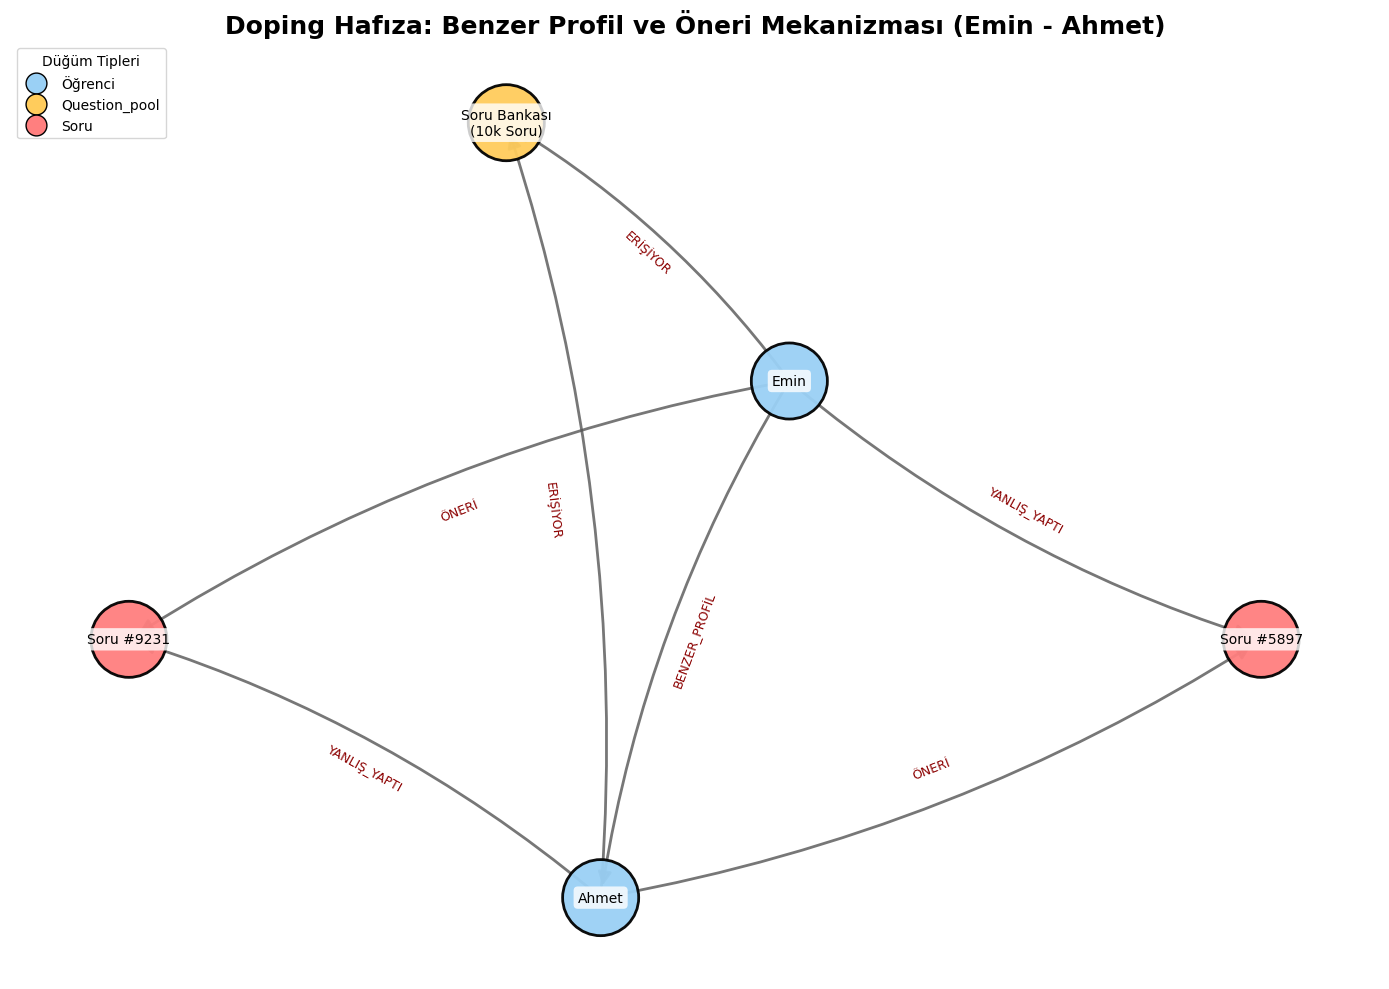

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def create_similar_graph():
    """
    Benzer profil ve öneri mekanizması içeren Graph'ü oluşturur.
    """
    G_similar = nx.DiGraph()

    # ─────────────────────────────────────────────────────────────
    # 1) Öğrenci Düğümleri (Emin ve güncellenmiş Ahmet)
    # ─────────────────────────────────────────────────────────────
    G_similar.add_node(
        "Emin",
        type="öğrenci",
        VideoCount=5,
        SolvedQCount=40,
        Accuracy=0.78,
        label="Emin"
    )

    G_similar.add_node(
        "Ahmet",
        type="öğrenci",
        VideoCount=5,
        SolvedQCount=38,
        Accuracy=0.77,
        label="Ahmet"
    )

    # ─────────────────────────────────────────────────────────────
    # 2) Soru Bankası ve Örnek Sorular
    # ─────────────────────────────────────────────────────────────
    G_similar.add_node(
        "Soru Bankası",
        type="question_pool",
        toplamSoru=10000,
        label="Soru Bankası\n(10k Soru)"
    )

    G_similar.add_node("Soru #9231", type="soru", label="Soru #9231")
    G_similar.add_node("Soru #5897", type="soru", label="Soru #5897")

    # ─────────────────────────────────────────────────────────────
    # 3) İlişkiler
    # ─────────────────────────────────────────────────────────────
    # Benzer profil ilişkisi (Emin -> Ahmet)
    G_similar.add_edge("Emin", "Ahmet", relation="BENZER_PROFİL", similarity=0.82)

    # Her iki öğrenci de soru bankasına erişiyor
    G_similar.add_edge("Emin", "Soru Bankası", relation="ERİŞİYOR")
    G_similar.add_edge("Ahmet", "Soru Bankası", relation="ERİŞİYOR")

    # Ahmet’in yanlış yaptığı soru ve Emin’in yanlış yaptığı soru
    G_similar.add_edge("Ahmet", "Soru #9231", relation="YANLIŞ_YAPTI", cozumSuresi=65)
    G_similar.add_edge("Emin", "Soru #5897", relation="YANLIŞ_YAPTI", cozumSuresi=50)

    # Öneri mekanizması:
    # - Ahmet'in yanlış yaptığı soru, benzer profildeki Emin’e öneriliyor.
    # - Emin'in yanlış yaptığı soru, benzer profildeki Ahmet’e öneriliyor.
    G_similar.add_edge("Ahmet", "Soru #5897", relation="ÖNERİ")
    G_similar.add_edge("Emin", "Soru #9231", relation="ÖNERİ")

    return G_similar

def plot_similar_graph(G_similar):
    """
    Oluşturulan graph'ü görselleştirir.
    """
    node_type_colors = {
        "öğrenci":       "#9ad0f5",
        "question_pool": "#ffcc5c",
        "soru":          "#ff7f7f",
    }

    node_colors = [
        node_type_colors.get(G_similar.nodes[node].get("type", ""), "#888888")
        for node in G_similar.nodes
    ]

    shells = [
        ["Emin", "Ahmet"],
        ["Soru Bankası"],
        ["Soru #9231", "Soru #5897"]
    ]
    pos = nx.shell_layout(G_similar, nlist=shells)

    plt.figure(figsize=(14, 10))
    ax = plt.gca()

    nx.draw_networkx_nodes(
        G_similar,
        pos,
        node_color=node_colors,
        node_size=3000,
        edgecolors="black",
        linewidths=2,
        alpha=0.95
    )

    nx.draw_networkx_edges(
        G_similar,
        pos,
        width=2,
        alpha=0.8,
        arrows=True,
        arrowsize=20,
        arrowstyle='-|>',
        edge_color="#555555",
        connectionstyle="arc3,rad=0.1"
    )

    node_labels = {node: G_similar.nodes[node]["label"] for node in G_similar.nodes}
    nx.draw_networkx_labels(
        G_similar,
        pos,
        labels=node_labels,
        font_size=10,
        font_color="black",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", boxstyle="round,pad=0.3")
    )

    edge_labels = nx.get_edge_attributes(G_similar, "relation")
    nx.draw_networkx_edge_labels(
        G_similar,
        pos,
        edge_labels=edge_labels,
        font_color="darkred",
        font_size=9,
        label_pos=0.5,
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round,pad=0.2")
    )

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=ntype.capitalize(),
               markerfacecolor=color, markersize=15, markeredgecolor='black')
        for ntype, color in node_type_colors.items()
    ]
    plt.legend(handles=legend_elements, loc='upper left', title="Düğüm Tipleri")

    plt.title("Doping Hafıza: Benzer Profil ve Öneri Mekanizması (Emin - Ahmet)",
              fontsize=18, fontweight="bold")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def main_similar():
    G_similar = create_similar_graph()
    plot_similar_graph(G_similar)

if __name__ == "__main__":
    main_similar()
